## Test task data analyst

The given dataset contains information about companies that used or did not use cloud services. 
'Usage of cloud services' variable is a binary variable , 0 = not used, 1= used. 
The binary variable is present for every year, and captures whether company used services in given year. 
Other variables are business and financial indicators of the company.

Task:
1. Explore and visualize dataset, explore correlations
2. Create regressions for each year in the form year= variables, to explore what is probability that company uses cloud in this year
3. (Optional) Find any other interesting patterns with the tool of your choise

All should be done in python notebook, clear code and comments will be beneficial

In [1]:
import numpy as np
from pandas import read_csv, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from matplotlib import pyplot as plt

# Read data from file 'filename.csv' 
data = read_csv("test_task.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,ID,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,Return on Capital Employed (%) 2019,Return on Capital Employed (%) 2018,Return on Capital Employed (%) 2017,Return on Capital Employed (%) 2016,Return on Capital Employed (%) 2015,Return on Capital Employed (%) 2014,Return on Capital Employed (%) 2013,Return on Capital Employed (%) 2012,Return on Capital Employed (%) 2011,Return on Capital Employed (%) 2010
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,n.a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.


In [2]:
# replace value 'n.a.' to NaN
data.replace('n.a.', np.nan, inplace=True)
# remove all rows whose cells are NaN
data = data.dropna()
ID = data['ID']
# remove conumn "ID"
data.drop('ID', axis=1, inplace=True)
# remove conumns from 12 to 18
data = data.drop(data.columns[range(12, 19)], axis=1)
data


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,Return on Capital Employed (%) 2019,Return on Capital Employed (%) 2018,Return on Capital Employed (%) 2017,Return on Capital Employed (%) 2016,Return on Capital Employed (%) 2015,Return on Capital Employed (%) 2014,Return on Capital Employed (%) 2013,Return on Capital Employed (%) 2012,Return on Capital Employed (%) 2011,Return on Capital Employed (%) 2010
4048,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,2.28,2.29,20.69,14.06,26.68,35.23,23.52,24.76,23.92,26.98
14500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.04,24.71,21.36,23.41,27.92,33.32,29.65,36.1,35.62,26.03
15391,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.01,3.58,4.52,3.97,5.05,6.86,6.17,10.18,7.97,4
16489,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,10.83,-29.16,2.03,11.06,2.58,10.58,11.04,9.48,25.52,27.65
48428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,12.6,14.36,10.77,6.78,3.01,16.4,14.14,18.32,9.49,-2.55
55729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.8,12.71,12.04,0.28,4.56,2.85,-42.7,-33.58,7.36,-17.9
57439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.29,16.53,18.92,24.55,14.51,13.41,20.77,17.22,6.12,18.41
59373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.56,24.57,43.77,19.81,20.02,18.76,24.38,25.75,39.34,20.64
64373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.66,73.7,88.66,153.48,168.16,235.22,367.02,251.45,228.72,313.51
66896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.87,32,40.21,42.69,77.25,31.24,101.21,105.88,110.12,108.57


In [3]:
# explore correlations
data.corr()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2008,1.000000e+00,0.912871,0.480240,0.099340,0.027778,0.148522,0.182574,0.099340,0.099340,0.144338,0.144338,6.810493e-17
2009,9.128709e-01,1.000000,0.624716,0.290191,0.182574,0.271163,0.142857,0.072548,0.072548,0.225877,0.090351,-4.517540e-02
2010,4.802402e-01,0.624716,1.000000,0.632118,0.480240,0.383379,0.230159,0.131194,0.131194,0.207950,0.051988,-1.039750e-01
2011,9.933993e-02,0.290191,0.632118,1.000000,0.794719,0.668856,0.507833,0.171053,0.171053,0.114708,-0.057354,-5.735393e-02
2012,2.777778e-02,0.182574,0.480240,0.794719,1.000000,0.668350,0.547723,0.331133,0.331133,0.288675,0.144338,1.443376e-01
2013,1.485221e-01,0.271163,0.383379,0.668856,0.668350,1.000000,0.759257,0.462298,0.462298,0.171499,-0.085749,-8.574929e-02
2014,1.825742e-01,0.142857,0.230159,0.507833,0.547723,0.759257,1.000000,0.725476,0.725476,0.225877,0.090351,9.035079e-02
2015,9.933993e-02,0.072548,0.131194,0.171053,0.331133,0.462298,0.725476,1.000000,1.000000,0.458831,0.286770,2.867697e-01
2016,9.933993e-02,0.072548,0.131194,0.171053,0.331133,0.462298,0.725476,1.000000,1.000000,0.458831,0.286770,2.867697e-01
2017,1.443376e-01,0.225877,0.207950,0.114708,0.288675,0.171499,0.225877,0.458831,0.458831,1.000000,0.678571,3.571429e-01


In [4]:
# variables to be predicted
Y = data[data.columns[:12]]
print(Y)


        2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019
4048     0.0   0.0   0.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0
14500    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
15391    1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0
16489    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
48428    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0
55729    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
57439    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
59373    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
64373    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
66896    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
68778    1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0
71272    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1

In [5]:
# variables that are characteristics
X = data[data.columns[12:]]

# Data normalization
X = preprocessing.normalize(X)
print(X)

[[ 1.00104916e-03  4.17754322e-01  1.04182376e-01 ...  5.39881884e-06
   5.21566020e-06  5.88288095e-06]
 [ 1.00992381e-03  7.41006761e-02  1.64729612e-01 ...  3.69684136e-06
   3.64768668e-06  2.66561719e-06]
 [ 1.91256346e-05  3.37084869e-01  4.88799114e-02 ...  6.02783159e-07
   4.71923554e-07  2.36849964e-07]
 ...
 [ 1.06979837e-03  1.01152549e-01  1.40205850e-01 ...  1.43488829e-05
   8.38291738e-05  3.89995279e-05]
 [ 1.35703135e-03  2.14748676e-01  1.28340779e-01 ...  9.65272976e-05
   6.57638268e-05 -1.18509977e-05]
 [ 1.83843466e-03  5.80316415e-02  1.49082537e-01 ...  1.46349075e-04
   2.45769686e-04  4.74364522e-04]]


In [6]:
# we divide values into training and test
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, Y, test_size=0.3)


In [7]:
Y_columns = [str(i) for i in range(2008, 2020)]
# create a dictionary of models whose keys are years and models are values for a given year
models = {}
for item in Y_columns:
    # we will use Logistic Regression
    models[item] = LogisticRegression(solver='lbfgs', max_iter = 10000)
# we carry out training of models
for item in Y_columns:
    models[item].fit(Xtrn, Ytrn[item]) 


In [8]:
# create a dictionary of values of the coefficients of determination
tmp = {}
for i in range(2008, 2020):
    tmp[str(i)] = r2_score(Ytest[str(i)], models[str(i)].predict(Xtest))
tmp

{'2008': -0.4444444444444444,
 '2009': -0.4444444444444444,
 '2010': -0.30000000000000004,
 '2011': -0.1818181818181821,
 '2012': -0.1818181818181821,
 '2013': -0.2999999999999998,
 '2014': -0.4444444444444444,
 '2015': -0.18181818181818188,
 '2016': -0.18181818181818188,
 '2017': -0.2999999999999998,
 '2018': -0.6249999999999998,
 '2019': -0.2999999999999998}

<BarContainer object of 12 artists>

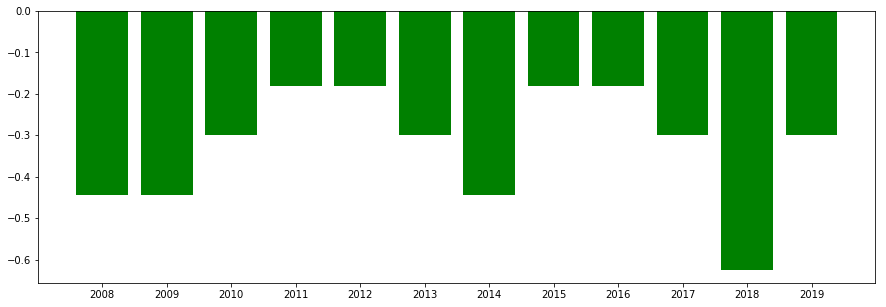

In [9]:
# data histogram
plt.figure(figsize=(15,5))
plt.bar(tmp.keys(), tmp.values(), color='g')

In [10]:
# probability that company uses cloud in this year
result_prob = []
for item in Y_columns:
    a = np.array(models[item].predict_proba(X))    
    result_prob.append(a[:, 0])
result_prob =  DataFrame(np.array(result_prob).transpose(), index=ID)
result_prob.columns = Y_columns
result_prob

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ID,,,,,,,,,,,,
4048,0.904122,0.872257,0.921918,0.880411,0.801435,0.762069,0.814323,0.931619,0.931619,0.658292,0.628189,0.630074
14500,0.933770,0.900377,0.931716,0.934027,0.870010,0.837880,0.897061,0.929760,0.929760,0.690491,0.681256,0.605979
15391,0.811685,0.774139,0.895304,0.926653,0.879348,0.824550,0.855438,0.919756,0.919756,0.482321,0.514353,0.575039
16489,0.954891,0.920103,0.938145,0.936124,0.859426,0.826151,0.915476,0.934212,0.934212,0.733937,0.738524,0.639509
48428,0.931549,0.894094,0.930127,0.933665,0.867016,0.824081,0.896260,0.927654,0.927654,0.658878,0.666389,0.594697
55729,0.946311,0.909681,0.934462,0.933773,0.864854,0.830883,0.910259,0.934342,0.934342,0.685730,0.723729,0.640735
57439,0.951089,0.917462,0.937179,0.933510,0.858979,0.828394,0.907919,0.933251,0.933251,0.743607,0.737414,0.643159
59373,0.948271,0.915934,0.937260,0.935198,0.865086,0.836193,0.907195,0.932846,0.932846,0.733174,0.724220,0.629876
64373,0.959736,0.926970,0.940601,0.933875,0.853570,0.830299,0.918066,0.937808,0.937808,0.772958,0.769261,0.669391
